In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

C:\ProgramData\manu\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cr=pd.read_csv("F:/creditcard.csv")

In [4]:
cr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cr.shape

(284807, 31)

In [6]:
# In this there are 3 imp.things class,time and amount
cr[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [7]:
cr.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# checking for null values
cr.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
null_columns=pd.DataFrame({'Columns':cr.isna().sum().index,'No of Null values':cr.isna().sum().values,'Percentage':cr.isna().sum().values/cr.shape[0]})

In [12]:
null_columns

,Columns,No of Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [13]:
cr['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

In [16]:
# total number of not fraud transaction
count=0
notfraud=cr['Class']
for i in range(len(notfraud)):
  if notfraud[i]==0:
    count=count+1

count    
per=(count/len(notfraud))*100
print('percentage of total not fraud transaction in the dataset: ',per)

percentage of total not fraud transaction in the dataset:  99.82725143693798


In [17]:
# total rows
notfraud

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [19]:
# total number of fraud transaction
count1=0
fraud=cr['Class']
for i in range(len(fraud)):
  if fraud[i]==1:
    count1=count1+1

count1    
per=(count1/len(fraud))*100
print('percentage of total fraud transaction in the dataset: ',per)

percentage of total fraud transaction in the dataset:  0.1727485630620034


In [20]:
# we create dataframe
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=fraud
plot_data['Genuine Transaction']=notfraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


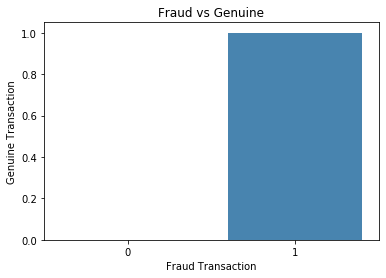

In [21]:
# display graph
plt.title("Fraud vs Genuine")
sns.barplot(x="Fraud Transaction", y="Genuine Transaction",data=plot_data,palette='Blues')

In [ ]:
# as u see above ration of genuine transaction are higher than fraud

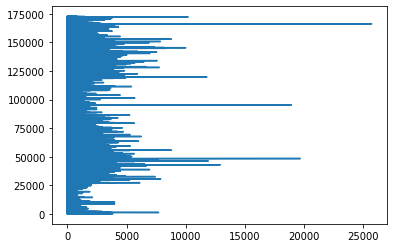

In [23]:
plt.plot(cr['Amount'],cr['Time'])

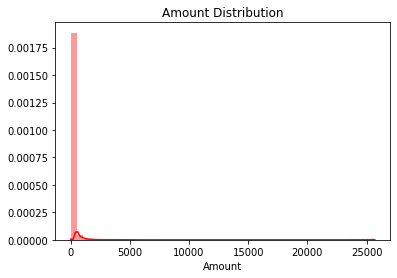

In [25]:
# In this we see higher number of trannaction is very low
plt.title("Amount Distribution")
sns.distplot(cr['Amount'],color='red');

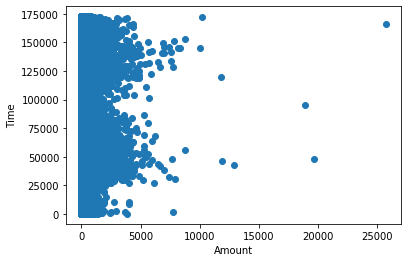

In [30]:
plt.scatter(cr['Amount'],cr['Time'])
plt.xlabel("Amount")
plt.ylabel("Time")
plt.show()

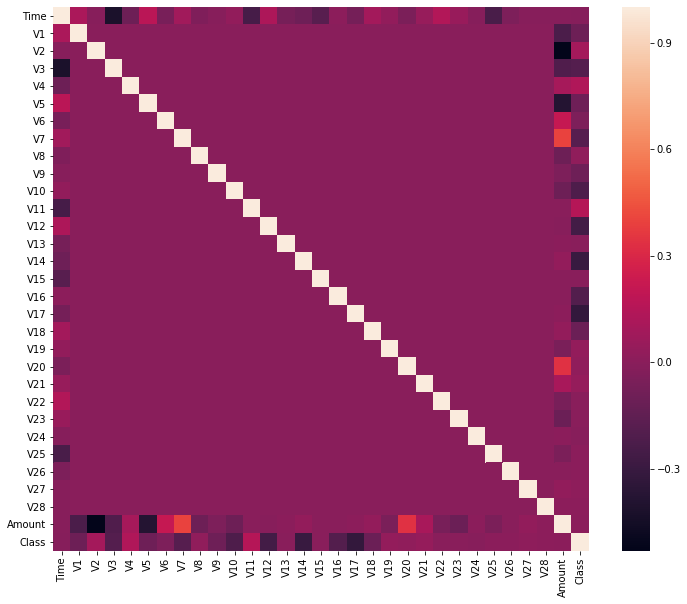

In [36]:
# Correlation matrix 
correlation_metrics = cr.corr()
fig = plt.figure(figsize=(12,10)) 
sns.heatmap(correlation_metrics) 
plt.show() 

In [37]:
x=cr.drop(['Class'],axis=1) #drop the target variable
y=cr['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size = 0.2,random_state =40) 

In [39]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

C:\ProgramData\manu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred =model.predict(xtest)

In [41]:
accuracy= model.score(xtest,ytest)

In [42]:
accuracy

0.9988588883817282

In [44]:
print("Accuracy of the Logistic regression model is:",accuracy*100)

Accuracy of the Logistic regression model is: 99.88588883817282


In [43]:
# Confusion matrix
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[56836    29]
 [   36    61]]
